# Load LGMR data

In [1]:
import xarray as xr
# import numpy as np

data_dir = 'D:/VScode/Last_deglaciation/climo_ana_data'
ds_sat = xr.open_dataset(data_dir + '/ds_GMM_climo_relabeled.nc')

# read the all_weighted_avg_curves
import pickle
with open('ens_ana_data/all_weighted_avg_curves_checked.pkl', 'rb') as f:
    all_weighted_avg_curves = pickle.load(f)


# Load the LGMR classes mask
# read the label_check
import pickle
with open('ens_ana_data/label_check_with_prob.pkl', 'rb') as f:
    label_check = pickle.load(f)

# Load TraCE all

Ref: He et al., 2011, SIMULATING TRANSIENT CLIMATE EVOLUTION OF THE LAST DEGLACIATION WITH CCSM3

In [2]:
import xarray as xr

def pre_process_trace_data(file_path):
    """
    Reads and preprocesses TraCE .nc data file.

    Parameters:
    file_path (str): Path to the .nc data file.

    Returns:
    xarray.Dataset: Preprocessed dataset with temperature in degrees Celsius and age in years BP.
    """
    # Import .nc data
    ds = xr.open_dataset(file_path)
    
    # Rename variables for clarity
    ds = ds.rename({'TREFHT': 'sat', 'time': 'age'})
    
    # Convert 'age' from model time to years BP (before present)
    ds['age'] = ds['age'] * -1000  # Assuming 'time' is in thousands of years
    
    # Convert temperature from Kelvin to Celsius
    ds['sat'] = ds['sat'] - 273.15
    
    # Keep only the 'sat' variable
    ds = ds[['sat']]
    
    return ds

trace_all_path='TraCE_data/trace.01-36.22000BP.cam2.TREFHT.22000BP_decavg_400BCE.nc'
trace_ghg_path='data_fig3/b30.00_4kaDVTk.cam2.ncrcat.ann.nc'
trace_orb_path='TraCE_data/b30.00_4kaDVTj.cam2.ncrcat.ann.nc'
trace_icesheet_path='TraCE_data/b30.00_4kaDVTz.cam2.ncrcat.ann.nc'
trace_fwf_path='TraCE_data/b30.00_4kaDVTn.cam2.ncrcat.ann.nc'

ds_trace_all = pre_process_trace_data(trace_all_path)
ds_trace_ghg = pre_process_trace_data(trace_ghg_path)
ds_trace_orb = pre_process_trace_data(trace_orb_path)
ds_trace_icesheet = pre_process_trace_data(trace_icesheet_path)
ds_trace_fwf = pre_process_trace_data(trace_fwf_path)



shape of the weight: (96,)
shape of the reshaped sat_centered_weighted: (2204, 13824)


TraCE all


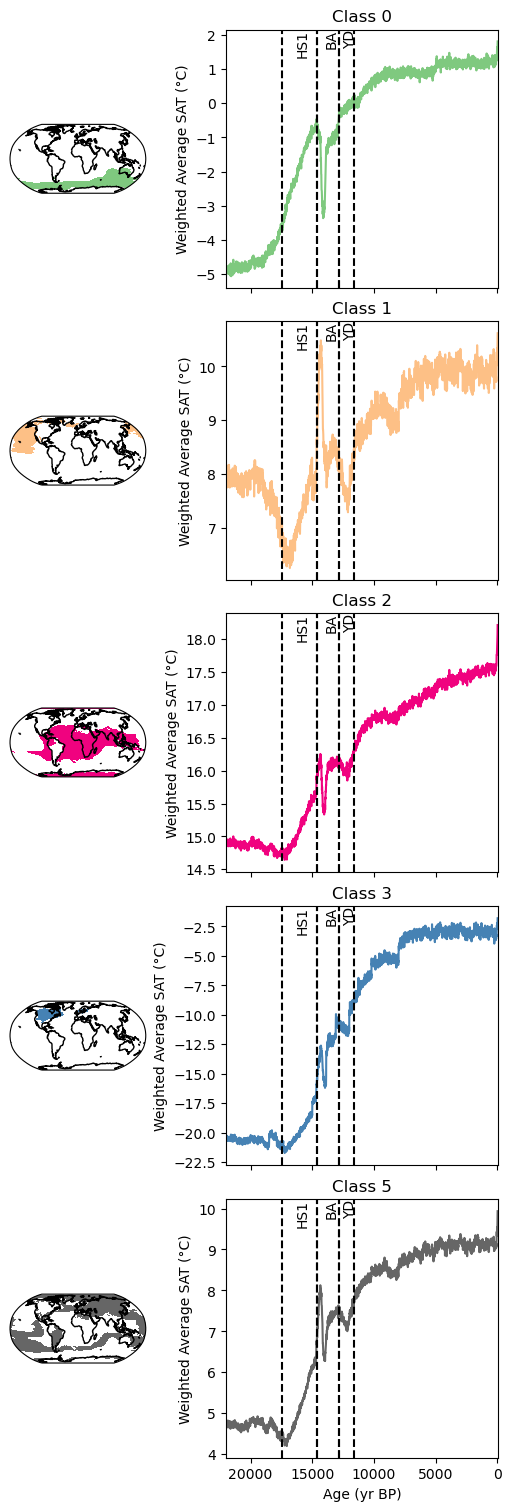

shape of the weight: (96,)
shape of the reshaped sat_centered_weighted: (2204, 13824)


TraCE ghg


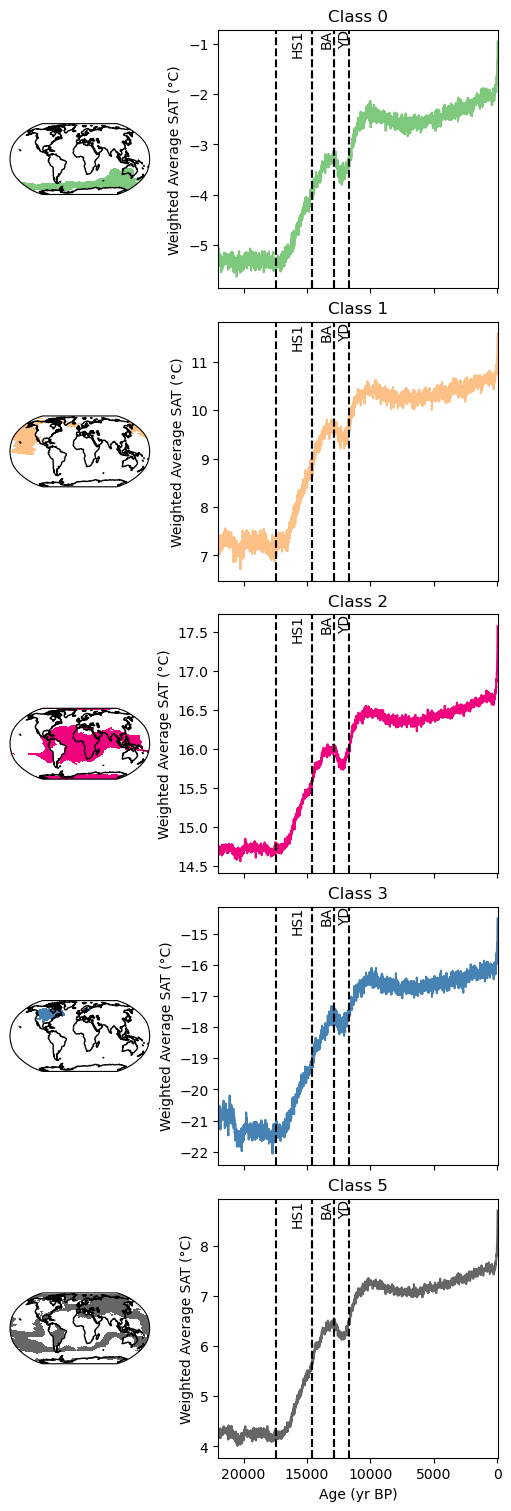

shape of the weight: (96,)
shape of the reshaped sat_centered_weighted: (2204, 13824)


TraCE orb


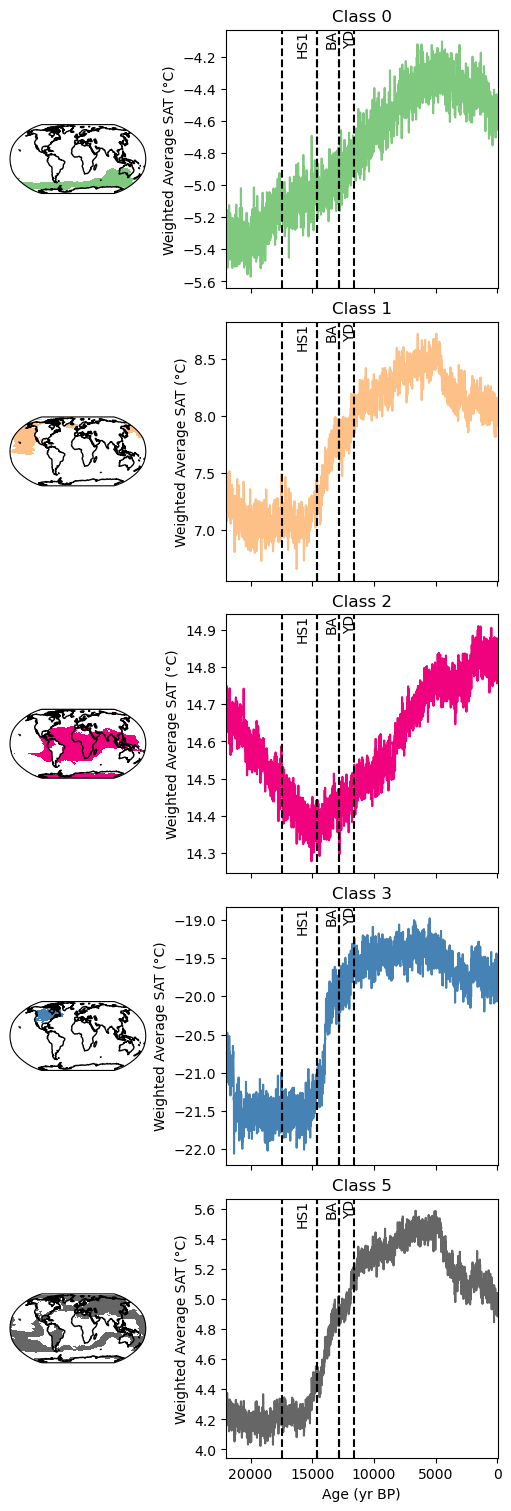

shape of the weight: (96,)
shape of the reshaped sat_centered_weighted: (1904, 13824)


TraCE ice sheet


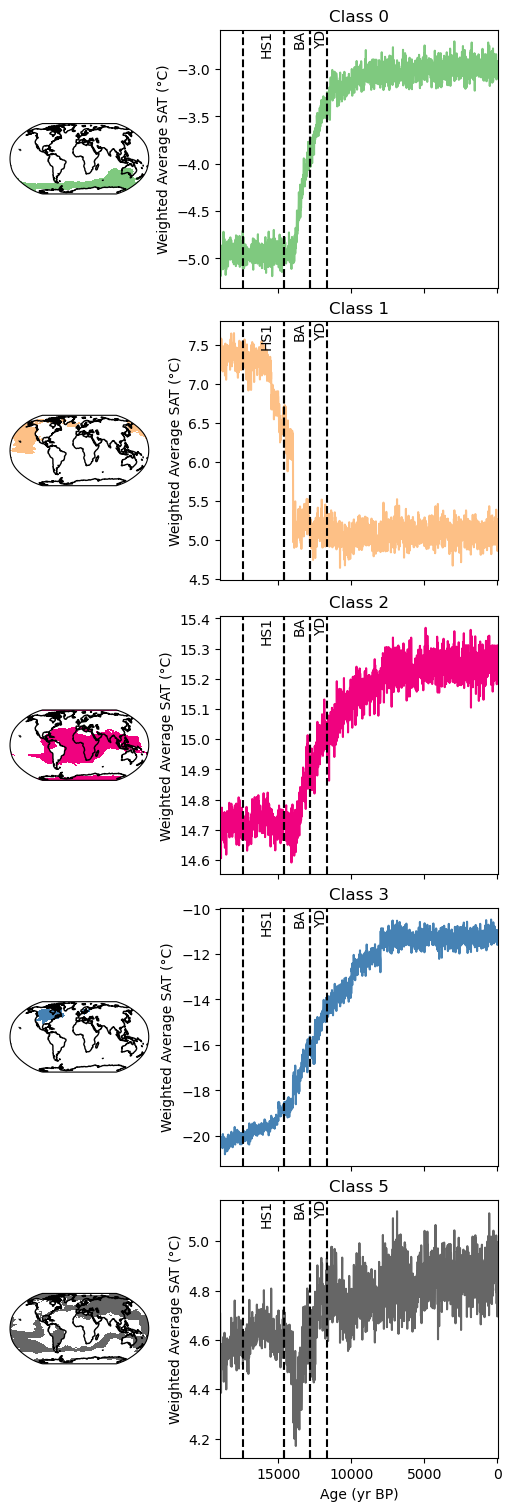

shape of the weight: (96,)
shape of the reshaped sat_centered_weighted: (1904, 13824)


TraCE fwf


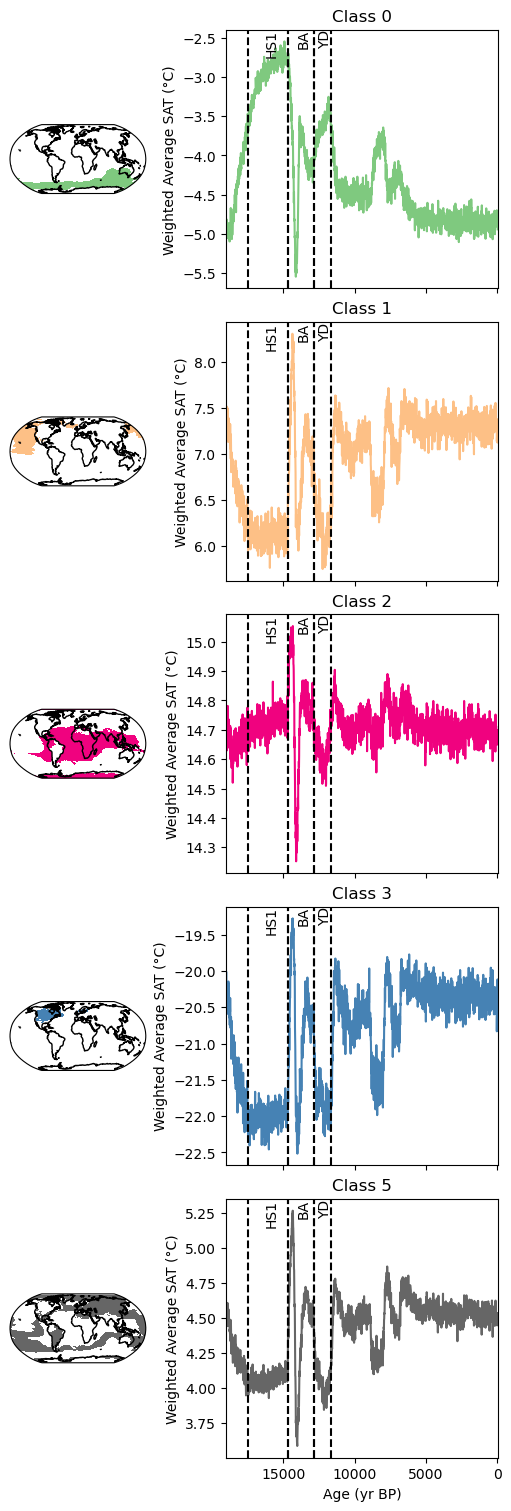

In [3]:
import xarray as xr
from toolbox import PCA_functions as pf
from toolbox import GMM_functions as gfs

def sample_trace_data_with_LGMR_mask(ds_sat, ds_trace, label_check, trace_label=''):
    """
    Interpolates the TraCE dataset to the LGMR grid, applies class labels,
    centers and weights the data, and plots the weighted average curve.

    Parameters:
    ds_sat (xarray.Dataset): The LGMR dataset containing 'class_relabeled' and coordinate grids.
    ds_trace (xarray.Dataset): The TraCE dataset to be interpolated and processed.
    label_check (numpy.ndarray): Array used to create 'class_relabeled_checked'.

    Returns:
    tuple: Processed TraCE dataset and the weighted average curves.
    """
    # Define the new grid to interpolate to (using ds_sat's grid)
    new_lat = ds_sat.lat
    new_lon = ds_sat.lon

    # Perform the interpolation
    ds_trace_interpolated = ds_trace.interp(lat=new_lat, lon=new_lon, method='linear')

    # Assign class labels
    ds_trace_interpolated['class_relabeled'] = ds_sat['class_relabeled']
    ds_trace_interpolated['class_relabeled_checked'] = (('lat', 'lon'), label_check.reshape(96, 144))

    # 1. Center the Data
    ds_trace_interpolated = pf.center_data(ds_trace_interpolated)

    # 2. Weight the Data
    ds_trace_interpolated = pf.apply_weighting(ds_trace_interpolated)

    # print the trace_label
    print('\n')
    print(trace_label)

    # 3. Plot weighted average curve
    weighted_avg_curves = gfs.plot_weighted_average_curve(
        ds_trace_interpolated.copy(),
        label_var_name='class_relabeled_checked',
        dpi=100
    )

    return ds_trace_interpolated, weighted_avg_curves

ds_trace_all, TraCE_all_weighted_avg_LGMR_mask=sample_trace_data_with_LGMR_mask(ds_sat, ds_trace_all, label_check,trace_label='TraCE all')
ds_trace_ghg, TraCE_ghg_weighted_avg_LGMR_mask=sample_trace_data_with_LGMR_mask(ds_sat, ds_trace_ghg, label_check,trace_label='TraCE ghg')
ds_trace_orb, TraCE_orb_weighted_avg_LGMR_mask=sample_trace_data_with_LGMR_mask(ds_sat, ds_trace_orb, label_check,trace_label='TraCE orb')
ds_trace_icesheet, TraCE_icesheet_weighted_avg_LGMR_mask=sample_trace_data_with_LGMR_mask(ds_sat, ds_trace_icesheet, label_check,trace_label='TraCE ice sheet')
ds_trace_fwf, TraCE_fwf_weighted_avg_LGMR_mask=sample_trace_data_with_LGMR_mask(ds_sat, ds_trace_fwf, label_check,trace_label='TraCE fwf')


# LGMR VS TraCE all

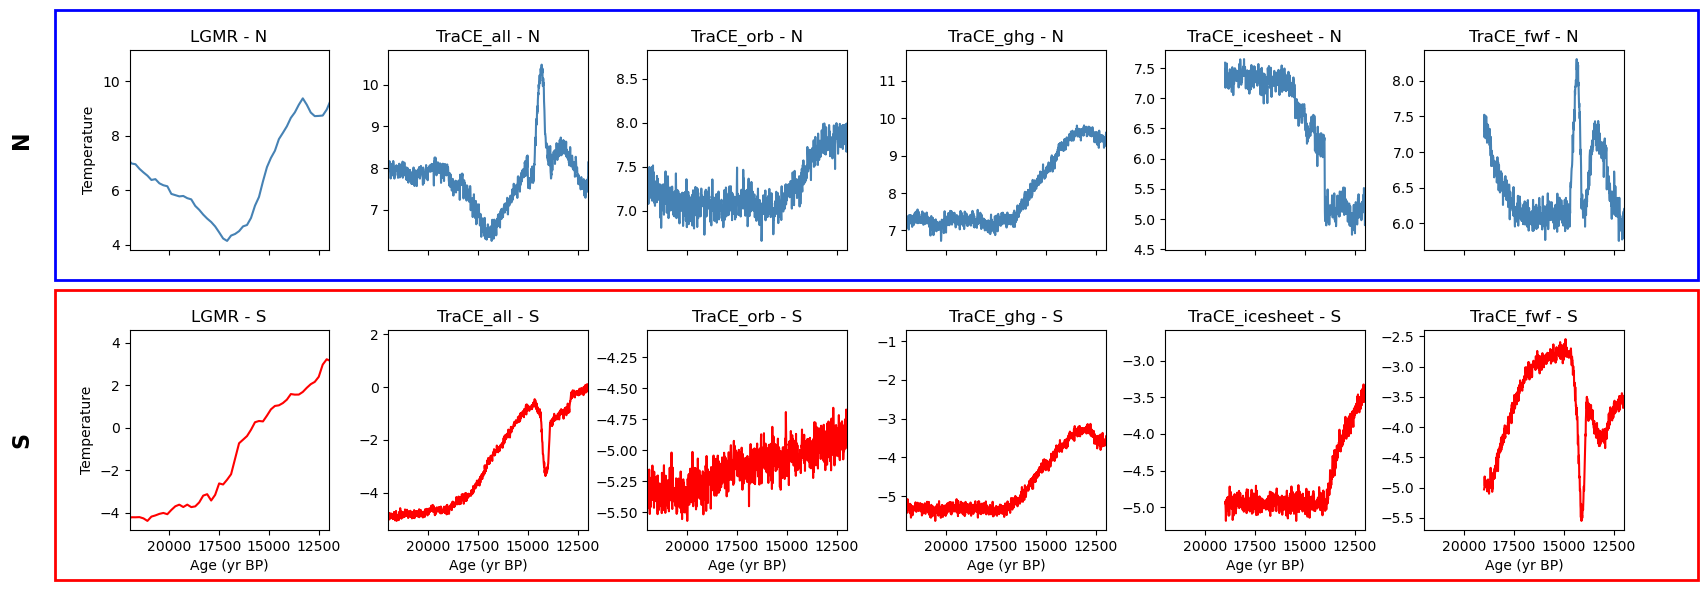

In [4]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Rectangle
from matplotlib.transforms import Bbox

LGMR_S= [curves[0] for curves in all_weighted_avg_curves]
# calculate the median
LGMR_S = np.median(LGMR_S, axis=0)

LGMR_N= [curves[1] for curves in all_weighted_avg_curves]
# calculate the median
LGMR_N = np.median(LGMR_N, axis=0)
LGMR_age=ds_sat['age'].values

trace_all_S=TraCE_all_weighted_avg_LGMR_mask[0]
trace_all_N=TraCE_all_weighted_avg_LGMR_mask[1]
trace_age=ds_trace_all['age'].values

trace_orb_S=TraCE_orb_weighted_avg_LGMR_mask[0]
trace_orb_N=TraCE_orb_weighted_avg_LGMR_mask[1]
trace_orb_age=ds_trace_orb['age'].values

trace_ghg_S=TraCE_ghg_weighted_avg_LGMR_mask[0]
trace_ghg_N=TraCE_ghg_weighted_avg_LGMR_mask[1]
trace_ghg_age=ds_trace_ghg['age'].values


trace_icesheet_S=TraCE_icesheet_weighted_avg_LGMR_mask[0]
trace_icesheet_N=TraCE_icesheet_weighted_avg_LGMR_mask[1]
trace_icesheet_age=ds_trace_icesheet['age'].values

# generate some random data with shape of (len(trace_icesheet_age),)
trace_fwf_S=TraCE_fwf_weighted_avg_LGMR_mask[0]
trace_fwf_N=TraCE_fwf_weighted_avg_LGMR_mask[1]
trace_fwf_age=ds_trace_fwf['age'].values

datasets = [
    {'name': 'LGMR', 'N': LGMR_N, 'S': LGMR_S, 'age': LGMR_age},
    {'name': 'TraCE_all', 'N': trace_all_N, 'S': trace_all_S, 'age': trace_age},
    {'name': 'TraCE_orb', 'N': trace_orb_N, 'S': trace_orb_S, 'age': trace_orb_age},
    {'name': 'TraCE_ghg', 'N': trace_ghg_N, 'S': trace_ghg_S, 'age': trace_ghg_age},
    {'name': 'TraCE_icesheet', 'N': trace_icesheet_N, 'S': trace_icesheet_S, 'age': trace_icesheet_age},
    {'name': 'TraCE_fwf', 'N': trace_fwf_N, 'S': trace_fwf_S, 'age': trace_fwf_age}
]

fig, axs = plt.subplots(2, 6, figsize=(18, 6), sharex=True, sharey=False)
plt.subplots_adjust(wspace=0.3, hspace=0.4, left=0.12, right=0.95, top=0.9, bottom=0.1)

for col, dataset in enumerate(datasets):
    for row in [0, 1]:
        ax = axs[row, col]
        if row == 0:
            data = dataset['N']
            label = dataset['name'] + ' - N'
            # ax.set_ylim(-1, 11)
        else:
            data = dataset['S']
            label = dataset['name'] + ' - S'
            # ax.set_ylim(-6, 5)
        age = dataset['age']
        
        ax.set_title(label)
        ax.set_xlim([22000, 12000])
        if col == 0:
            ax.set_ylabel('Temperature')
        if row==0:
            ax.plot(age, data,'steelblue')
        if row == 1:
            ax.plot(age, data,'r')  
            ax.set_xlabel('Age (yr BP)')

# axs[0,0].set_ylim=[2,11]


fig.text(0.06, 0.75, 'N', ha='center', va='center', fontsize=16, rotation='vertical', fontweight='bold')
fig.text(0.06, 0.25, 'S', ha='center', va='center', fontsize=16, rotation='vertical', fontweight='bold')

def add_row_rectangle(axs_row, color, alpha, lower_ratio, high_ratio=1.35):
    positions = [ax.get_position() for ax in axs_row]
    bbox = Bbox.union(positions)
    rect = Rectangle((bbox.x0-0.05*bbox.width, bbox.y0-lower_ratio*bbox.height), 1.1*bbox.width, high_ratio*bbox.height,
                     linewidth=2, edgecolor=color, facecolor='none', alpha=alpha,
                     transform=fig.transFigure, zorder=1)  # Set z-order to 1 to ensure it is above the background
    fig.add_artist(rect)

add_row_rectangle(axs[0, :], color='b', alpha=1, lower_ratio=0.15)
add_row_rectangle(axs[1, :], color='r', alpha=1, lower_ratio=0.25, high_ratio=1.45)

plt.show()


# Scatter plot, not normalized

In [15]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming the variables are already defined as per your code:
# LGMR_S, LGMR_N, LGMR_age, trace_all_S, trace_all_N, trace_age, etc.

datasets = [
    {'name': 'LGMR', 'N': LGMR_N, 'S': LGMR_S, 'age': LGMR_age},
    {'name': 'TraCE_all', 'N': trace_all_N, 'S': trace_all_S, 'age': trace_age},
    {'name': 'TraCE_orb', 'N': trace_orb_N, 'S': trace_orb_S, 'age': trace_orb_age},
    {'name': 'TraCE_ghg', 'N': trace_ghg_N, 'S': trace_ghg_S, 'age': trace_ghg_age},
    {'name': 'TraCE_ice sheet', 'N': trace_icesheet_N, 'S': trace_icesheet_S, 'age': trace_icesheet_age},
    {'name': 'TraCE_fwf', 'N': trace_fwf_N, 'S': trace_fwf_S, 'age': trace_fwf_age}
]

# Create figure and axes
fig, axs = plt.subplots(2, 3, figsize=(18, 9), dpi=900)
plt.subplots_adjust(wspace=0.3, hspace=0.3)

# Set global vmin and vmax for age to ensure consistent color mapping
vmin = 12000
vmax = 22000

for idx, dataset in enumerate(datasets):
    row = idx // 3
    col = idx % 3
    ax = axs[row, col]
    
    S = dataset['S']
    N = dataset['N']
    age = dataset['age']
    
    # Ensure that S, N, and age are numpy arrays
    S = np.array(S)
    N = np.array(N)
    age = np.array(age)
    
    # Handle any NaN values
    mask = ~np.isnan(S) & ~np.isnan(N) & ~np.isnan(age)
    S = S[mask]
    N = N[mask]
    age = age[mask]
    
    # Set grid to be behind the plot
    ax.set_axisbelow(True)
    
    # Create scatter plot
    sc = ax.scatter(S, N, c=age, cmap='RdYlBu_r', vmin=vmin, vmax=vmax)
    ax.set_title(dataset['name'])
    ax.set_xlabel('Southern Class SAT (°C)')
    ax.set_ylabel('Northern Class SAT (°C)')
    ax.grid(True)
    
# Add a single colorbar for all subplots
cbar = fig.colorbar(sc, ax=axs.ravel().tolist(), shrink=0.95)
cbar.set_label('Age (yr BP)')

plt.show()


# Plot all data together, not normalized

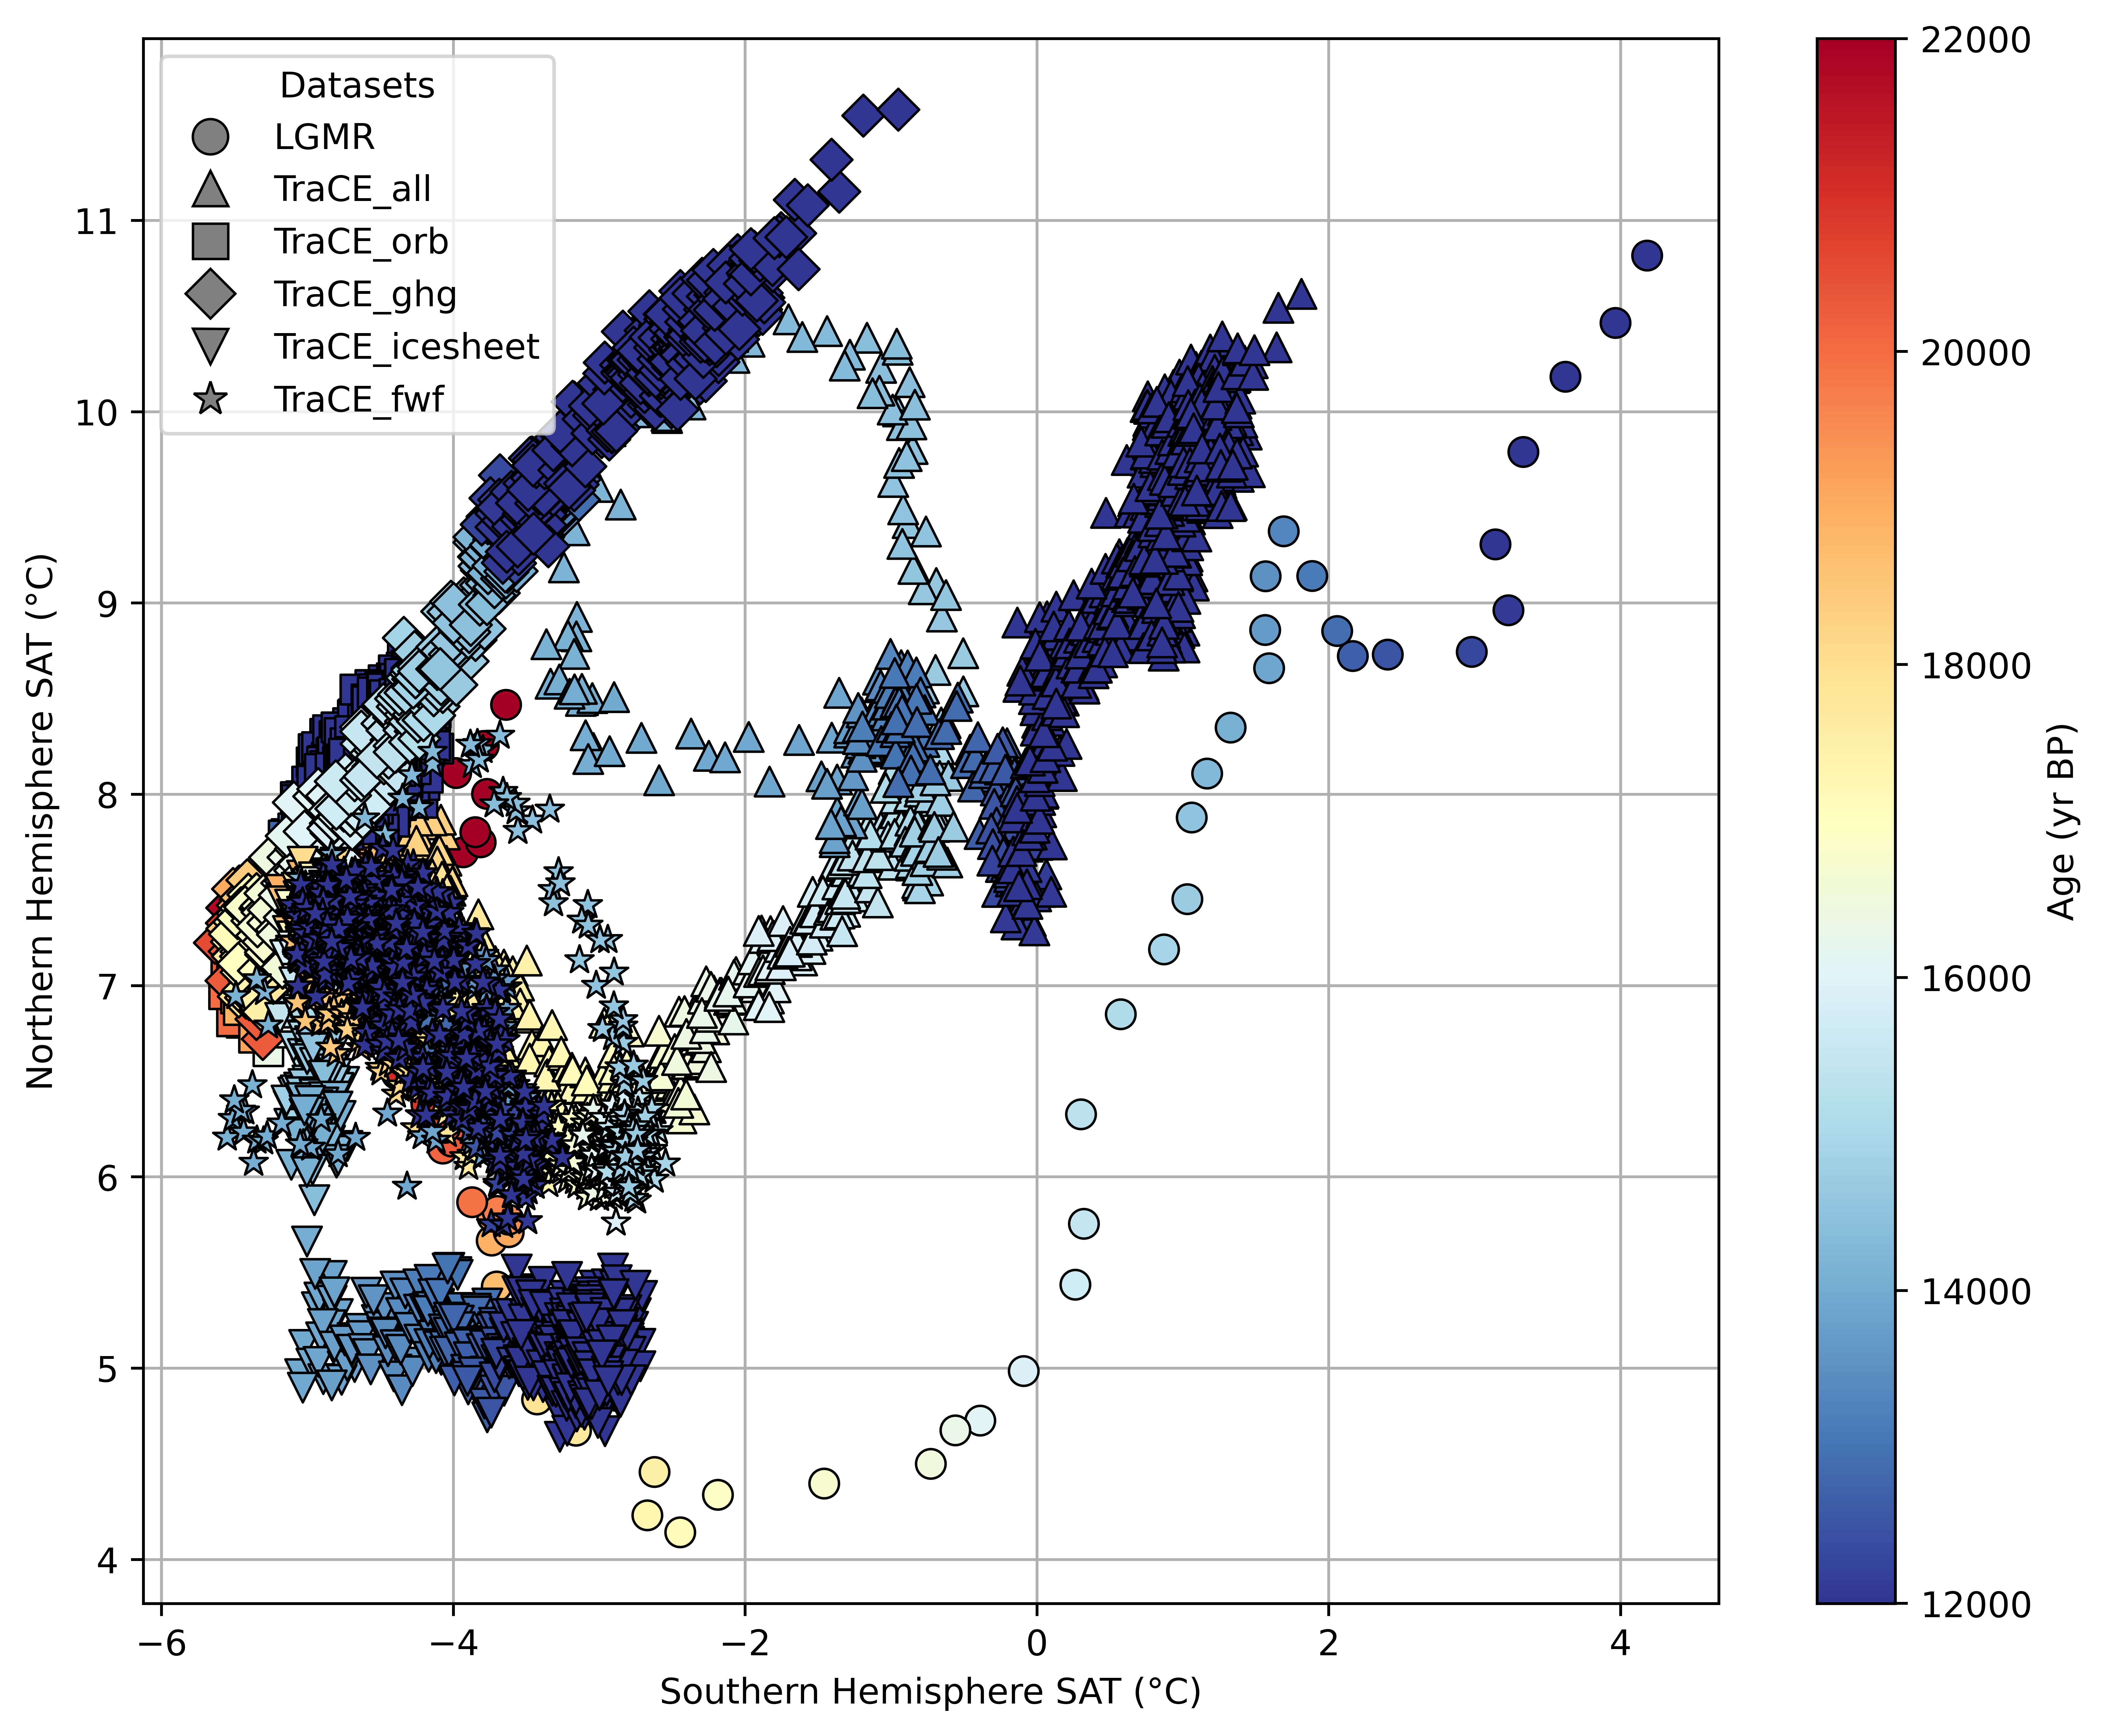

In [9]:
import matplotlib.pyplot as plt
import numpy as np


datasets = [
    {'name': 'LGMR', 'N': LGMR_N, 'S': LGMR_S, 'age': LGMR_age},
    {'name': 'TraCE_all', 'N': trace_all_N, 'S': trace_all_S, 'age': trace_age},
    {'name': 'TraCE_orb', 'N': trace_orb_N, 'S': trace_orb_S, 'age': trace_orb_age},
    {'name': 'TraCE_ghg', 'N': trace_ghg_N, 'S': trace_ghg_S, 'age': trace_ghg_age},
    {'name': 'TraCE_icesheet', 'N': trace_icesheet_N, 'S': trace_icesheet_S, 'age': trace_icesheet_age},
    {'name': 'TraCE_fwf', 'N': trace_fwf_N, 'S': trace_fwf_S, 'age': trace_fwf_age}
]

# Create figure and axis
fig, ax = plt.subplots(figsize=(10, 8), dpi=900)

# Set global vmin and vmax for age to ensure consistent color mapping
vmin = 12000
vmax = 22000

# Define markers for datasets
markers = ['o', '^', 's', 'D', 'v', '*']

# To store legend handles
legend_elements = []

for idx, dataset in enumerate(datasets):
    S = dataset['S']
    N = dataset['N']
    age = dataset['age']
    
    # Ensure that S, N, and age are numpy arrays
    S = np.array(S)
    N = np.array(N)
    age = np.array(age)
    
    # Handle any NaN values
    mask = ~np.isnan(S) & ~np.isnan(N) & ~np.isnan(age)
    S = S[mask]
    N = N[mask]
    age = age[mask]
    
    # Assign marker
    marker = markers[idx % len(markers)]
    
    # Create scatter plot with specified marker edge linewidth
    sc = ax.scatter(S, N, c=age, cmap='RdYlBu_r', vmin=vmin, vmax=vmax,
                    marker=marker, edgecolors='k', s=70, linewidths=0.7)
    
    # Create a proxy artist for the legend with specified marker edge linewidth
    legend_element = plt.Line2D([0], [0], marker=marker, color='w', label=dataset['name'],
                                markerfacecolor='gray', markersize=10, markeredgecolor='k',
                                markeredgewidth=0.7)
    legend_elements.append(legend_element)
    
ax.set_xlabel('Southern Hemisphere SAT (°C)')
ax.set_ylabel('Northern Hemisphere SAT (°C)')
ax.grid(True)
ax.set_axisbelow(True)

# Add legend for datasets
ax.legend(handles=legend_elements, title='Datasets')

# Add a colorbar
cbar = fig.colorbar(sc)
cbar.set_label('Age (yr BP)')

plt.show()


# TraCE=TraCE*1.6

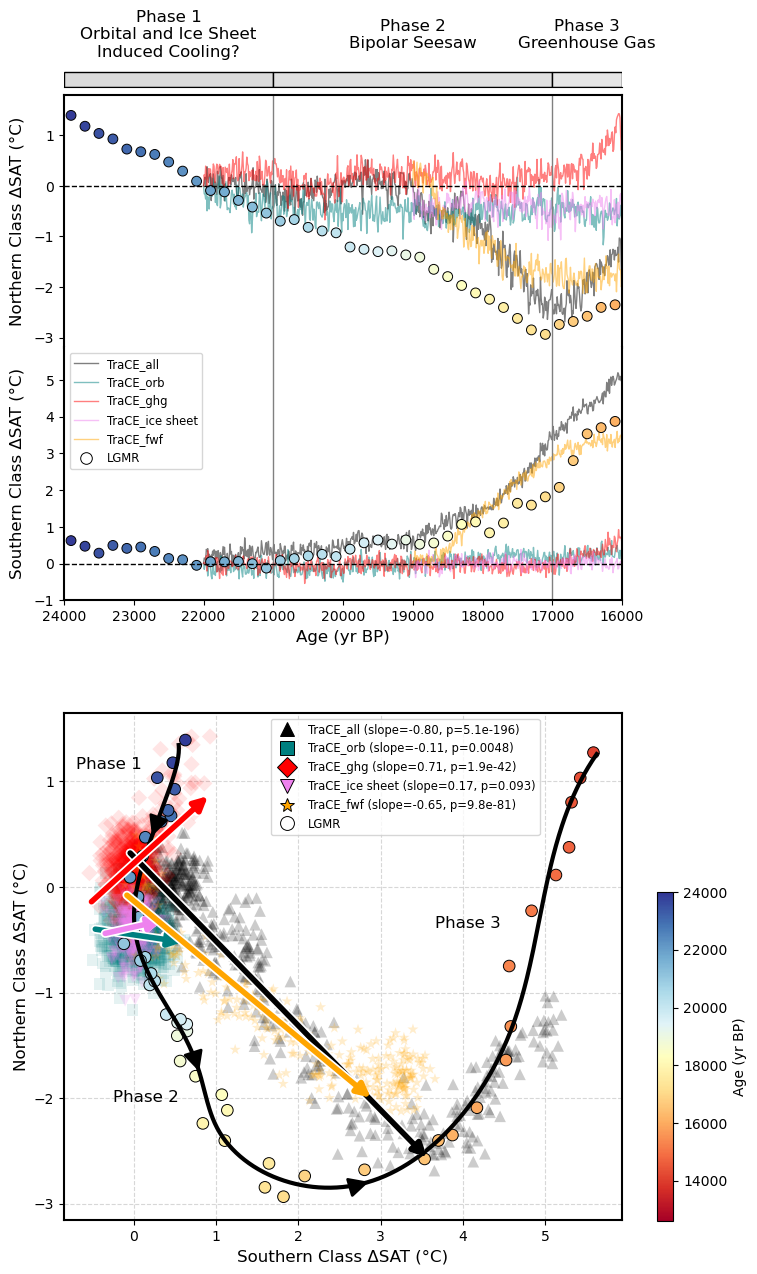

In [115]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress
import pandas as pd
from scipy.interpolate import splprep, splev
from matplotlib.colors import Normalize
import matplotlib.cm as cm
from matplotlib.patches import Rectangle



datasets = [

    {'name': 'TraCE_all', 'N': trace_all_N, 'S': trace_all_S, 'age': trace_age},
    {'name': 'TraCE_orb', 'N': trace_orb_N, 'S': trace_orb_S, 'age': trace_orb_age},
    {'name': 'TraCE_ghg', 'N': trace_ghg_N, 'S': trace_ghg_S, 'age': trace_ghg_age},
    {'name': 'TraCE_ice sheet', 'N': trace_icesheet_N, 'S': trace_icesheet_S, 'age': trace_icesheet_age},
    {'name': 'TraCE_fwf', 'N': trace_fwf_N, 'S': trace_fwf_S, 'age': trace_fwf_age},
    {'name': 'LGMR', 'N': LGMR_N, 'S': LGMR_S, 'age': LGMR_age}
]

def get_value_at_age(data, age_array, target_age=20000):
    """
    Interpolate the value of 'data' at 'target_age' based on 'age_array'.
    """
    if target_age in age_array:
        return data[age_array == target_age][0]
    else:
        sorted_indices = np.argsort(age_array)
        age_sorted = age_array[sorted_indices]
        data_sorted = data[sorted_indices]
        return np.interp(target_age, age_sorted, data_sorted)

# Create figure and axes with specified height ratios
fig, axs = plt.subplots(3, 1, figsize=(9, 15), dpi=100, gridspec_kw={'height_ratios': [1, 1, 2]})

ax1 = axs[0]  # N anomalies vs. age
ax2 = axs[1]  # S anomalies vs. age
ax3 = axs[2]  # Original scatter plot

# Define markers and colors for datasets
markers = [  '^', 's', 'D', 'v','*', 'o']
colors = ['k', 'teal', 'red', 'violet', 'orange', 'brown']

# To store legend handles
legend_elements = []

for idx, dataset in enumerate(datasets):
    S = dataset['S']
    N = dataset['N']
    age = dataset['age']

    # Ensure that S, N, and age are numpy arrays
    S = np.array(S)
    N = np.array(N)
    age = np.array(age)

    # Scale TraCE data by 1.6
    if dataset['name'] != 'LGMR':
        S = S * 1.6
        N = N * 1.6

    # Handle any NaN values
    mask = ~np.isnan(S) & ~np.isnan(N) & ~np.isnan(age)
    S = S[mask]
    N = N[mask]
    age = age[mask]

    # Assign marker and color
    marker = markers[idx % len(markers)]
    color = colors[idx % len(colors)]

    # # For 'TraCE' datasets, smooth and resample data
    # if 'TraCE' in dataset['name']:
    #     # Create a pandas DataFrame with 'age' as the index
    #     df = pd.DataFrame({'S': S, 'N': N}, index=age)

    #     # Ensure the index is sorted in ascending order
    #     if df.index.is_monotonic_decreasing:
    #         df = df.iloc[::-1]

    #     # Apply 200-year moving average (window size in periods)
    #     window_size = 20  # Since data is in 10-year steps
    #     df_smoothed = df.rolling(window=window_size, center=True, min_periods=1).mean()

    #     # Resample to 200-year intervals
    #     resample_ages = np.arange(df_smoothed.index.min(), df_smoothed.index.max() + 1, 200)
    #     df_resampled = df_smoothed.reindex(resample_ages, method='nearest')

    #     # Update S, N, and age
    #     S = df_resampled['S'].values
    #     N = df_resampled['N'].values
    #     age = df_resampled.index.values

    # Calculate the anomalies relative to age 20000
    S_ref = get_value_at_age(S, age, target_age=22000)
    N_ref = get_value_at_age(N, age, target_age=22000)

    S = S - S_ref
    N = N - N_ref

    # Set age masks for plotting and fitting
    if dataset['name'] == 'LGMR':
        # For LGMR, plot data between 11,000 and 24,000 yr BP
        plot_age_mask = (age >= 14000) & (age <= 24000)
        fit_age_mask = plot_age_mask  # For spline fitting, use the same range

        # Data for plotting
        S_plot = S[plot_age_mask]
        N_plot = N[plot_age_mask]
        age_plot = age[plot_age_mask]

        # Reverse the colormap so younger data is more red
        norm = Normalize(vmin=24000, vmax=14000)
        cmap = cm.RdYlBu  # Reverse the colormap to make younger data red

        # Plot N anomalies vs. age in ax1
        sc1 = ax1.scatter(age_plot, N_plot, c=age_plot, cmap=cmap, norm=norm,
                          marker=marker, edgecolors='k', s=50, linewidths=0.7, alpha=1)

        # Plot S anomalies vs. age in ax2
        sc2 = ax2.scatter(age_plot, S_plot, c=age_plot, cmap=cmap, norm=norm,
                          marker=marker, edgecolors='k', s=50, linewidths=0.7, alpha=1)

        # Create scatter plot with colors according to age in ax3
        sc3 = ax3.scatter(S_plot, N_plot, c=age_plot, cmap=cmap, norm=norm,
                          marker=marker, edgecolors='k', s=70, linewidths=0.7, alpha=1)
        


        # Add colorbar for LGMR data on ax3
        cbar = plt.colorbar(sc3, ax=ax3, shrink=0.65)
        cbar.set_label('Age (yr BP)')


        # Proceed with spline fitting and plotting as before
        # Data for spline fitting
        tck, u = splprep([S_plot, N_plot], s=0.6)
        # Generate points along the spline for plotting
        u_fine = np.linspace(0, 1, 500)
        S_spline, N_spline = splev(u_fine, tck)

        # Plot the spline on ax3
        ax3.plot(S_spline, N_spline, color='k', linestyle='-', linewidth=3)

        # Add three arrows along the spline
        num_arrows = 3
        arrow_positions = np.linspace(0.4, 0.9, num_arrows)
        phase_labels = ['Phase 3', 'Phase 2', 'Phase 1']

        for idx_phase, pos in enumerate(arrow_positions):
            idx_arrow = int(pos * len(S_spline))
            if idx_arrow >= len(S_spline) - 1:
                idx_arrow = len(S_spline) - 2

            x_start = S_spline[idx_arrow]
            y_start = N_spline[idx_arrow]
            x_end = S_spline[idx_arrow + 1]
            y_end = N_spline[idx_arrow + 1]

            # Plot arrow
            ax3.annotate('', xy=(x_end, y_end), xytext=(x_start, y_start),
                         arrowprops=dict(arrowstyle='<|-', color='k', linewidth=2, mutation_scale=30))

            # Add text label near the arrow
            label = phase_labels[idx_phase]

            # Calculate normal vector to the arrow direction
            dx = x_end - x_start
            dy = y_end - y_start
            norm_dx = -dy
            norm_dy = dx
            # Normalize the normal vector
            norm_length = np.hypot(norm_dx, norm_dy)
            norm_dx /= norm_length
            norm_dy /= norm_length

            # Offset the text position along the normal vector
            text_offset = 0.15  # Adjust as needed
            text_x = x_end + norm_dx * text_offset
            text_y = y_end + norm_dy * text_offset

            # ax3.text(text_x, text_y, label, fontsize=12, color='k',
            #          horizontalalignment='center', verticalalignment='center')
            
            # Add text to the plot
            if idx_phase == 0:
                ax3.text(text_x+1.2, text_y+2.6, label, fontsize=12, color='k',
                        horizontalalignment='center', verticalalignment='center')
            if idx_phase == 1:
                ax3.text(text_x-0.5, text_y-0.2, label, fontsize=12, color='k',
                        horizontalalignment='center', verticalalignment='center')
            if idx_phase == 2:
                ax3.text(text_x-0.4, text_y+0.6, label, fontsize=12, color='k',
                        horizontalalignment='center', verticalalignment='center')

        # Create legend entry for the dataset marker without color (since LGMR is color-coded by age)
        dataset_label = dataset['name']
        marker_legend_element = plt.Line2D([0], [0], marker=marker, color='w', label=dataset_label,
                                           markerfacecolor='none', markersize=10, markeredgecolor='k',
                                           markeredgewidth=0.7)
        legend_elements.append(marker_legend_element)

    else:
        # For TraCE datasets, plot data between 11,000 and 22,000 yr BP
        plot_age_mask = (age >= 16000) & (age <= 22000)
        # For linear regression, use data between 17,000 and 22,000 yr BP
        if dataset['name'] == 'TraCE_ghg' or dataset['name'] == 'TraCE_orb':
            # For these datasets, use data between 11,000 and 22,000 yr BP
            fit_age_mask = (age >= 16000) & (age <= 22000)
        else:
            fit_age_mask = (age >= 17000) & (age <= 22000)

        # Data for plotting
        S_plot = S[plot_age_mask]
        N_plot = N[plot_age_mask]
        age_plot = age[plot_age_mask]

        # Data for fitting
        S_fit = S[fit_age_mask]
        N_fit = N[fit_age_mask]

        # Plot N anomalies vs. age in ax1
        ax1.plot(age_plot, N_plot, color=color, linestyle='-', linewidth=1, alpha=0.5, label=dataset['name'], zorder=0)

        # Plot S anomalies vs. age in ax2
        ax2.plot(age_plot, S_plot, color=color, linestyle='-', linewidth=1, alpha=0.5, label=dataset['name'], zorder=0)

        if dataset['name'] == 'TraCE_ghg' or dataset['name'] == 'TraCE_orb':
            # Create scatter plot in ax3
            sc = ax3.scatter(S_plot, N_plot, color=color,
                         marker=marker, edgecolors='none', s=70, linewidths=0.7, alpha=0.1)
        else:
            sc = ax3.scatter(S_plot, N_plot, color=color,
                         marker=marker, edgecolors='none', s=70, linewidths=0.7, alpha=0.2)
        


        # Perform linear regression on fitting data
        slope, intercept, r_value, p_value, std_err = linregress(S_fit, N_fit)

        # Plot regression line with a larger arrow at the end on ax3
        S_line = np.array([np.min(S_fit), np.max(S_fit)])
        N_line = slope * S_line + intercept

        ax3.annotate('', xy=(S_line[-1], N_line[-1]), xytext=(S_line[0], N_line[0]),
                     arrowprops=dict(arrowstyle='-|>', color='w', linewidth=6.5, mutation_scale=15))
        
        ax3.annotate('', xy=(S_line[-1], N_line[-1]), xytext=(S_line[0], N_line[0]),
                     arrowprops=dict(arrowstyle='-|>', color=color, linewidth=4, mutation_scale=20))
        


        # Update dataset label to include slope and p-value
        dataset_label = f"{dataset['name']} (slope={slope:.2f}, p={p_value:.2g})"

        # Create legend entry for the dataset marker with updated label
        marker_legend_element = plt.Line2D([0], [0], marker=marker, color='w', label=dataset_label,
                                           markerfacecolor=color, markersize=10, markeredgecolor='k',
                                           markeredgewidth=0.7)
        legend_elements.append(marker_legend_element)

# Set labels and styles for ax1 (N anomalies vs. age)
ax1.set_ylabel('Northern Class ΔSAT (°C)', fontsize=12)
ax1.invert_xaxis()
ax1.grid(True, linestyle='--', alpha=0.5)
ax1.tick_params(axis='both', which='major', labelsize=10)
ax1.xaxis.set_visible(False)  # Hide x-axis, x ticks, and x tick labels

# Set labels and styles for ax2 (S anomalies vs. age)
ax2.set_ylabel('Southern Class ΔSAT (°C)', fontsize=12)
ax2.invert_xaxis()
ax2.grid(True, linestyle='--', alpha=0.5)
ax2.tick_params(axis='both', which='major', labelsize=10)
ax2.set_xlabel('Age (yr BP)', fontsize=12)

# Set labels and styles for ax3 (Scatter plot)
ax3.set_xlabel('Southern Class ΔSAT (°C)', fontsize=12)
ax3.set_ylabel('Northern Class ΔSAT (°C)', fontsize=12)
ax3.grid(True, linestyle='--', alpha=0.5)
ax3.set_axisbelow(True)
ax3.tick_params(axis='both', which='major', labelsize=10)

# Set the linewidth of the spines for all axes
for ax in [ax1, ax2, ax3]:
    for spine in ax.spines.values():
        spine.set_linewidth(1.5)

# Add legend for datasets on ax3
ax3.legend(handles=legend_elements, title='', fontsize='small', loc=[0.37, 0.76])

##########################################

# Adjust the layout to make space for the phase bar
plt.subplots_adjust(top=0.92, hspace=0.3)

# Create a new axis for the phase bar on top of ax1
pos = ax1.get_position()
phase_ax = fig.add_axes([pos.x0, pos.y1 + 0.005, pos.width, 0.05])
phase_ax.yaxis.set_visible(False)

# Set x-axis limits to ages and invert x-axis
phase_ax.set_xlim(16000, 24000)
phase_ax.invert_xaxis()

# # Set xticks at phase boundaries
# xticks = [24000, 22000, 17000, 11000]
# phase_ax.set_xticks(xticks)
# phase_ax.set_xticklabels([str(age) for age in xticks])

phase_ax.set_xticks([])  # Hide xticks

# Remove unnecessary spines
phase_ax.spines['top'].set_visible(False)
phase_ax.spines['right'].set_visible(False)
phase_ax.spines['left'].set_visible(False)
phase_ax.spines['bottom'].set_position(('outward', 0))

# Draw rectangles for phases
phases = [
    {'name': 'Phase 1\nOrbital and Ice Sheet\nInduced Cooling?', 'start_age': 24000, 'end_age': 21000, 'color': [0.86, 0.86, 0.86]},
    {'name': 'Phase 2\nBipolar Seesaw', 'start_age': 21000, 'end_age': 17000, 'color': [0.88, 0.88, 0.88]},
    {'name': 'Phase 3\nGreenhouse Gas', 'start_age': 17000, 'end_age': 16000, 'color': [0.9, 0.9, 0.9]},
]

# set ylim
ax1.set_ylim(-3.2, 1.8)
ax2.set_ylim(-1, 5.9)

# Get y-limits for ax1 and ax2
ymin1, ymax1 = ax1.get_ylim()
ymin2, ymax2 = ax2.get_ylim()

# for ax 1 and ax 2 at grey vertical lines at phase boundaries
ax1.axvline(21000, color='grey', linestyle='-', linewidth=1)
ax1.axvline(17000, color='grey', linestyle='-', linewidth=1)
ax2.axvline(21000, color='grey', linestyle='-', linewidth=1)
ax2.axvline(17000, color='grey', linestyle='-', linewidth=1)



# Add rectangle patches to ax1 and ax2
for phase in phases:
    start_age = phase['start_age']
    end_age = phase['end_age']
    width = end_age - start_age  # Negative because ages decrease

    # For ax1
    rect1 = Rectangle((start_age, ymin1), width, ymax1 - ymin1,
                      facecolor='w', edgecolor='none', zorder=-1)
    ax1.add_patch(rect1)

    # For ax2
    rect2 = Rectangle((start_age, ymin2), width, ymax2 - ymin2,
                      facecolor='w', edgecolor='none', zorder=-1)
    ax2.add_patch(rect2)


for phase in phases:
    # Positions for rectangle
    start_age = phase['start_age']
    end_age = phase['end_age']
    width = end_age - start_age  # Negative because ages decrease
    # Draw rectangle
    rect = Rectangle((start_age, 0.0), width, 0.2, facecolor=phase['color'], edgecolor='k')
    phase_ax.add_patch(rect)

    # Add text label at the center of the rectangle
    text_x = start_age + width / 2
    phase_ax.text(text_x, 0.7, phase['name'], ha='center', va='center', fontsize='large')

# Adjust tick parameters
phase_ax.tick_params(axis='x', which='both', bottom=True, top=False, labelbottom=True, rotation=45)

# # Ensure that the x-axis for ax1 and ax2 are linked
# ax1.set_xlim(24000, 11000)
# ax2.set_xlim(24000, 11000)

# Adjust the positions of ax1 and ax2 to match the width of ax3
pos3 = ax3.get_position()
pos1 = ax1.get_position()
pos2 = ax2.get_position()

# Set the positions of ax1 and ax2 to match the left and width of ax3
ax1.set_position([pos3.x0, pos1.y0, pos3.width, pos1.height])
ax2.set_position([pos3.x0, pos2.y0+0.068, pos3.width, pos2.height])

ax3.set_position([pos3.x0, pos3.y0+0.06, pos3.width, pos3.height])

# set the bottom spine of ax1 and the top spine of ax2 to be invisible
ax1.spines['bottom'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax1.grid(False)
ax2.grid(False)

# set the ax1, ax2 ylabel horizontal offset
ax1.yaxis.set_label_coords(-0.07, 0.5)
ax2.yaxis.set_label_coords(-0.07, 0.5)

# set the x-limit of ax1 and ax2 to be 24000 to 16000
ax1.set_xlim(24000, 16000)
ax2.set_xlim(24000, 16000)



# add legend for the ax2

ax2.scatter(10000, 0, c='w', marker='o', edgecolors='k', s=70, linewidths=0.7, alpha=1, label='LGMR')
ax2.legend(loc='upper left', fontsize='small')



# plot a dashed line at y=0 in ax1 and ax2
ax1.axhline(0, color='k', linestyle='--', linewidth=1)
ax2.axhline(0, color='k', linestyle='--', linewidth=1)

# Adjust the phase bar position as well
pos_phase = phase_ax.get_position()
phase_ax.set_position([pos3.x0, pos_phase.y0, pos3.width, pos_phase.height])


plt.show()
